In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
def Data_read(name):
    temp = pd.read_csv('data/Data_30_'+ name + ".csv",index_col = [0])
    temp.columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    return temp

In [3]:
Data_30_C = Data_read('C')

In [4]:
def visualize(data,name):
    Columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    data.iloc[:,Columns.index(name)].iplot(kind = 'scatter',xTitle = 'time',yTitle = name,title = '30일치 데이터 B위치')

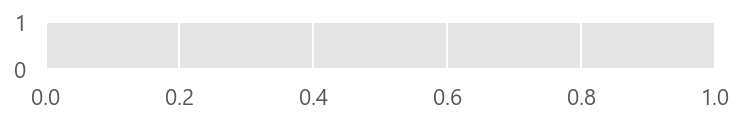

In [5]:
plt.subplot(8,1,1)
visualize(Data_30_C,'기온')
visualize(Data_30_C,'현지기압')
visualize(Data_30_C,'풍속')
visualize(Data_30_C,'일일 누적강수량')
visualize(Data_30_C,'해면기압')
visualize(Data_30_C,'일일 누적일사량')
visualize(Data_30_C,'습도')
visualize(Data_30_C,'풍향')

In [6]:
with open('data/Data_T_Y.pk','rb') as f:
    Data_Label = pickle.load(f)

In [7]:
def merge(data,data2):
    temp_data = pd.merge(data,data2,left_index = True,right_index = True)
    return temp_data

In [8]:
Data_C_with_label = merge(Data_30_C,Data_Label)

In [9]:
def Descending_correlation(data):
    temp = data.corr().iloc[:8,8:]
    temp2 = temp.copy()
    temp2 = abs(temp).sort_values(by = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'],ascending = False)
    return temp2

In [10]:
Descending_correlation(Data_C_with_label)

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
기온,0.974490,0.953917,0.958521,0.857562,0.856534,0.864041,0.752037,0.652907,0.872612,0.889321,0.899919,0.879923,0.733078,0.938310,0.916300,0.874344,0.855365,0.849162
습도,0.754633,0.832478,0.835887,0.586650,0.587095,0.801233,0.756575,0.715058,0.795320,0.823972,0.825795,0.837725,0.752426,0.818129,0.800127,0.811835,0.814710,0.824598
풍속,0.426710,0.536905,0.523080,0.297003,0.301397,0.553999,0.461422,0.403282,0.584181,0.572427,0.576839,0.594152,0.447501,0.563207,0.571512,0.533075,0.534896,0.570421
풍향,0.403283,0.461831,0.455958,0.310018,0.313005,0.445264,0.432335,0.397349,0.428160,0.465511,0.459975,0.462579,0.431299,0.442839,0.441823,0.436435,0.459779,0.446743
일일 누적강수량,0.192565,0.171028,0.174873,0.225591,0.227136,0.155416,0.153122,0.157377,0.129518,0.126614,0.125664,0.121645,0.163331,0.151197,0.154057,0.153548,0.153344,0.148521
해면기압,0.129721,0.165845,0.154988,0.066233,0.071377,0.140633,0.050429,0.012729,0.176176,0.153264,0.160288,0.170094,0.040916,0.145181,0.175209,0.104552,0.107135,0.126083
현지기압,0.042176,0.062880,0.052891,0.004385,0.000865,0.042719,0.049532,0.077155,0.082020,0.046908,0.054287,0.065976,0.057537,0.046119,0.082887,0.001936,0.003521,0.024276
일일 누적일사량,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
